In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


In [266]:
df_hipoteses = pd.read_csv('dados/hypotheses_us.csv', sep=';')
df_orders = pd.read_csv('dados/orders_us.csv')
df_visits = pd.read_csv('dados/visits_us.csv')

In [267]:
def avaliacao_inicial(df):

    df.info()

new_col_names = [old_name.strip().lower().replace(' ', '_') for old_name in df_hipoteses.columns]
df_hipoteses.columns = new_col_names
avaliacao_inicial(df_hipoteses)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [268]:

new_col_names = [old_name.strip().lower().replace(' ', '_') for old_name in df_orders.columns]
df_orders.columns = new_col_names
df_orders['date'] = pd.to_datetime(df_orders['date'])
df_orders['group'] = df_orders['group'].astype('category')

In [269]:
# Contar a quantidade de grupos distintos para cada ordersnte
grupos_por_orders = df_orders.groupby('visitorid')['group'].nunique()

# Identificar os ordersrId que estão em exatamente 2 grupos
ids_para_remover = grupos_por_orders[grupos_por_orders == 2].index

# Filtrar o DataFrame removendo os ordersntes que estão em 2 grupos
df_orders_filtrado = df_orders[~df_orders['visitorid'].isin(ids_para_remover)]

# Exibir resultado
print(f'Tinha {len(ids_para_remover)} visitantes em 2 grupos')
print(f"Total de entradas: {len(df_orders_filtrado)}")
avaliacao_inicial(df_orders)
df_orders


Tinha 58 visitantes em 2 grupos
Total de entradas: 1016
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 38.8 KB


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [270]:
df_visits['date'] = pd.to_datetime(df_visits['date'])
df_visits['group'] = df_visits['group'].astype('category')
avaliacao_inicial(df_visits)
df_visits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     category      
 2   visits  62 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.3 KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [271]:
# ICE       
print(df_hipoteses)

df_hipoteses['ICE'] = (df_hipoteses['impact']*df_hipoteses['confidence'])/df_hipoteses['effort']
df_hipoteses[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)


                                          hypothesis  reach  impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   confidence  effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
5           2       3  
6           8       3  
7           8       5  
8           9       5  


,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [272]:
# RICE
print(df_hipoteses)

df_hipoteses['RICE'] = (df_hipoteses['reach']*df_hipoteses['impact']*df_hipoteses['confidence'])/df_hipoteses['effort']
df_hipoteses[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

                                          hypothesis  reach  impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   confidence  effort        ICE  
0           8       6  13.333333  
1           4      10   2.000000  
2           7       3   7.000000  
3           3       8   1.125000  
4           1       1   1.000000  
5           2       3   1.333333  
6           8       3   8.000000  
7        

,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


In [273]:
# ICE RICE
df_hipoteses.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


Como o RICE leva em conta o alcanse e no caso a loja é online é uma metrica mais importante. E a hipótese de ID 7 tem o alcanse de 10 que seria ignorado pelo ICE.

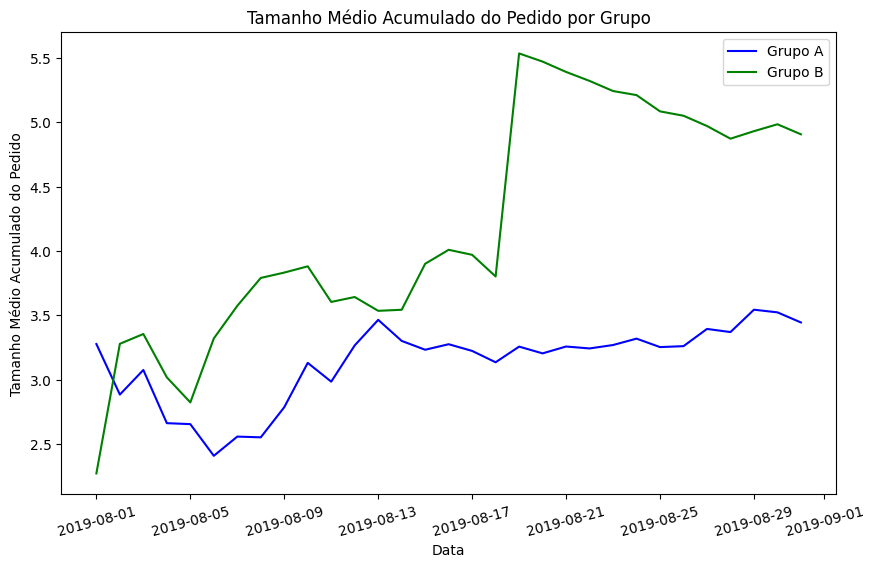

In [274]:
# Função para calcular o tamanho médio acumulado do pedido por grupo
def calcular_tamanho_medio_acumulado(df_orders, df_visits):
    # Filtrando e agrupando os dados
    df_merged = pd.merge(df_orders, df_visits, on='date')
    contas = {'revenue': 'sum', 'visits': 'max'}
    df_agg = df_merged.groupby('date')[['revenue', 'visits']].agg(contas).reset_index()

    # Calculando as somas acumuladas
    df_agg['revenue_cumsum'] = df_agg['revenue'].cumsum()
    df_agg['visits_cumsum'] = df_agg['visits'].cumsum()

    # Calculando o tamanho médio acumulado do pedido
    df_agg['mean_order_size'] = df_agg['revenue_cumsum'] / df_agg['visits_cumsum']

    return df_agg

# Calculando para cada grupo
df_orders_a = df_orders[df_orders['group'] == 'A']
df_orders_b = df_orders[df_orders['group'] == 'B']
df_visits_a = df_visits[df_visits['group'] == 'A']
df_visits_b = df_visits[df_visits['group'] == 'B']

df_merge_a = calcular_tamanho_medio_acumulado(df_orders_a, df_visits_a)
df_merge_b = calcular_tamanho_medio_acumulado(df_orders_b, df_visits_b)

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_merge_a['date'], df_merge_a['mean_order_size'], label='Grupo A', color='blue')
plt.plot(df_merge_b['date'], df_merge_b['mean_order_size'], label='Grupo B', color='green')
plt.title("Tamanho Médio Acumulado do Pedido por Grupo")
plt.xlabel("Data")
plt.ylabel("Tamanho Médio Acumulado do Pedido")
plt.xticks(rotation=15) 
plt.legend()
plt.show()


O Grupo B começou melhor porém logo o grupo A subiu abruptamente e se manteve até o final.
O grupo A se mostrou mais instável com 3 momentos de medias muito grandes, enquanto o grupo B se mostrou mas estável.

Grupo A apresenta um tamanho médio acumulado de pedido maior que o Grupo B ao longo do tempo, indicando uma estratégia mais eficaz de conversão de vendas.

In [275]:
df_merge_b

,date,revenue,visits,revenue_cumsum,visits_cumsum,mean_order_size
0,2019-08-01,1620.0,713,1620.0,713,2.272090
1,2019-08-02,2623.8,581,4243.8,1294,3.279598
2,2019-08-03,1806.8,509,6050.6,1803,3.355851
3,2019-08-04,1717.3,770,7767.9,2573,3.019005
4,2019-08-05,1495.0,707,9262.9,3280,2.824055
5,2019-08-06,3806.4,655,13069.3,3935,3.321296
6,2019-08-07,3531.5,709,16600.8,4644,3.574677
7,2019-08-08,3487.8,654,20088.6,5298,3.791733
8,2019-08-09,2558.1,610,22646.7,5908,3.833226
9,2019-08-10,1720.4,369,24367.1,6277,3.881966


C:\Users\jonat\AppData\Local\Temp\ipykernel_18592\2298108738.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


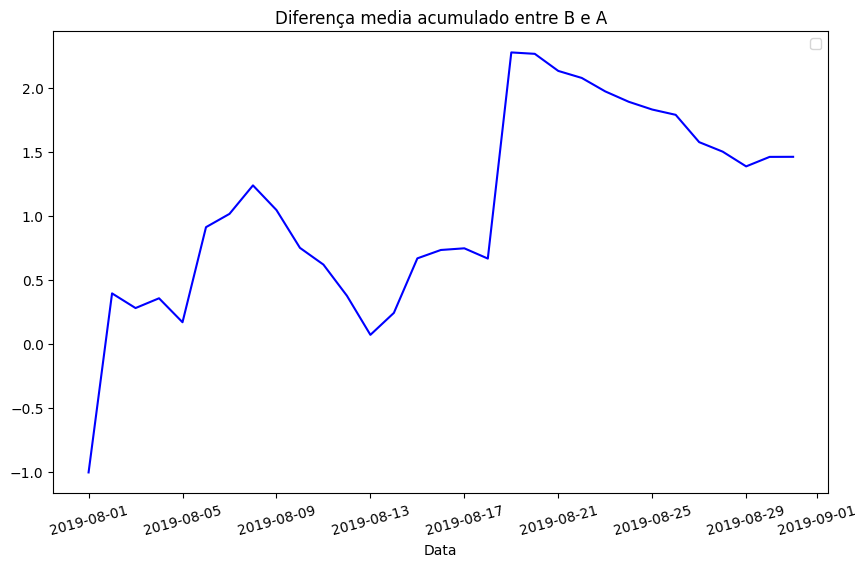

In [276]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_merge_a['date'], df_merge_b['mean_order_size'] - df_merge_a['mean_order_size'], color='blue')
plt.title("Diferença media acumulado entre B e A")
plt.xlabel("Data")
plt.xticks(rotation=15) 
plt.legend()
plt.show()



Neste gráfrico fica mais claro que no começo o grupo A tinha uma media maior, e logo o grupo B tinha mais media e se manteve até o final do periodo. 

In [277]:

# Merge para os grupos A e B (dados consistentes: orders e visits do mesmo grupo)
df_merge_a = pd.merge(df_orders_a, df_visits_a, on='date')
df_merge_b = pd.merge(df_orders_b, df_visits_b, on='date')

# Criando o merge geral concatenando os dados dos dois grupos
df_merge_all = pd.concat([df_merge_a, df_merge_b])

# Função para agrupar por data, contando visitantes únicos e obtendo o máximo de visitas por dia
def agrupar_por_data(df):
    return (
        df
        .groupby('date')
        .agg(
            visitor_count=('visitorid', 'count'),
            max_visits=('visits', 'max')
        )
        .reset_index()
    )

# Agrupando os dados
df_agrupado_a = agrupar_por_data(df_merge_a)
df_agrupado_b = agrupar_por_data(df_merge_b)
df_agrupado_all = agrupar_por_data(df_merge_all)

# Calculando a taxa de conversão: soma dos visitantes contados / soma dos máximos de visitas
taxa_conversao_a = df_agrupado_a['visitor_count'].sum() / df_agrupado_a['max_visits'].sum()
taxa_conversao_b = df_agrupado_b['visitor_count'].sum() / df_agrupado_b['max_visits'].sum()
taxa_conversao_all = df_agrupado_all['visitor_count'].sum() / df_agrupado_all['max_visits'].sum()

# Exibindo as taxas de conversão
print(f"""A taxa de conversão do Grupo A é de: {taxa_conversao_a * 100:.2f}% 
A taxa de conversão do Grupo B é de: {taxa_conversao_b * 100:.2f}% 
A taxa de conversão geral é de: {taxa_conversao_all * 100:.2f}%""")

A taxa de conversão do Grupo A é de: 2.97% 
A taxa de conversão do Grupo B é de: 3.38% 
A taxa de conversão geral é de: 6.19%


A taxa de converção de B é maior em relação a A, porém em relação ao panorama geral a diferença não é tão acentuada. Porém é uma diferença importante.

O que indicia que a estrategia usada no grupo B deu certo.

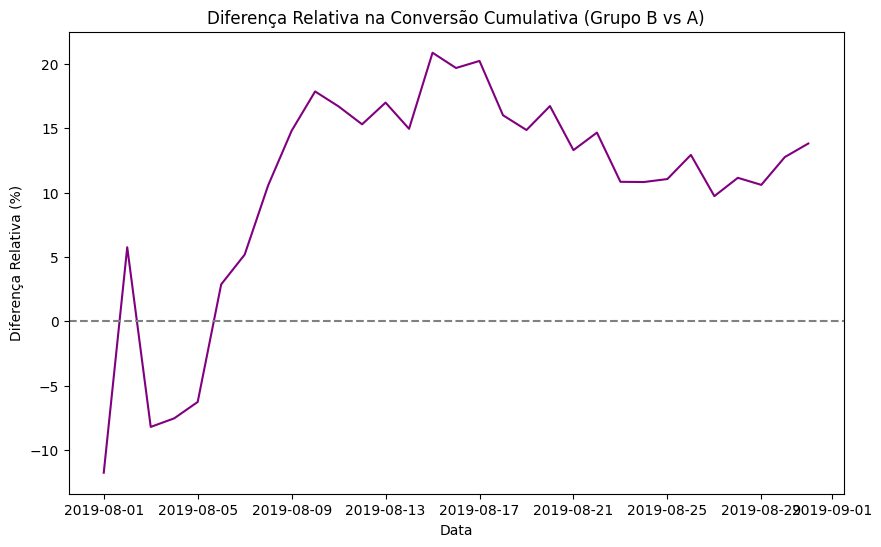

In [278]:
# Acumulando os pedidos e visitas ao longo do tempo
df_agrupado_a['pedidos_acumulados'] = df_agrupado_a['visitor_count'].cumsum()
df_agrupado_a['visitas_acumuladas'] = df_agrupado_a['max_visits'].cumsum()
df_agrupado_a['taxa_cumulativa'] = df_agrupado_a['pedidos_acumulados'] / df_agrupado_a['visitas_acumuladas']

df_agrupado_b['pedidos_acumulados'] = df_agrupado_b['visitor_count'].cumsum()
df_agrupado_b['visitas_acumuladas'] = df_agrupado_b['max_visits'].cumsum()
df_agrupado_b['taxa_cumulativa'] = df_agrupado_b['pedidos_acumulados'] / df_agrupado_b['visitas_acumuladas']
# Juntando os dois DataFrames pela data
df_taxas = pd.merge(
    df_agrupado_a[['date', 'taxa_cumulativa']],
    df_agrupado_b[['date', 'taxa_cumulativa']],
    on='date',
    suffixes=('_a', '_b')
)

# Calculando a diferença relativa do grupo B em relação ao A
df_taxas['diferenca_relativa'] = (df_taxas['taxa_cumulativa_b'] - df_taxas['taxa_cumulativa_a']) / df_taxas['taxa_cumulativa_a']
plt.figure(figsize=(10,6))
plt.plot(df_taxas['date'], df_taxas['diferenca_relativa'] * 100, color='purple')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Diferença Relativa na Conversão Cumulativa (Grupo B vs A)')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa (%)')
plt.show()


Até o dia 06/08 o Grupo A estava com uma converção maior porém depois deste dia o Grupo A nunca teve uma converção maior, oque indica que o Grupo B tem uma estrategia melhor.

In [279]:
# Agrupando por visitante (sem considerar o grupo)
df_orders_agrupado = df_orders.groupby('visitorid')['transactionid'].count().reset_index()
df_orders_agrupado = df_orders_agrupado.rename(columns={'transactionid': 'n_pedidos'})

# Pegando o grupo de cada visitante (apenas o primeiro registro de cada visitante)
grupo_por_visitante = df_orders[['visitorid', 'group']].drop_duplicates(subset='visitorid')

# Fazendo o merge para adicionar a coluna 'group'
df_orders_agrupado = df_orders_agrupado.merge(grupo_por_visitante, on='visitorid', how='left')

# Exibindo os percentis 95 e 99
print(np.percentile(df_orders_agrupado['n_pedidos'], [95, 99]))


[2. 4.]


Uma grande maioria dos usuários tem apenas 1 transação. porém 5% tem mais de 2 e 1% tem mais de 4 transações.

O ponto em que os dados se tornam anomalia é 2 transações.

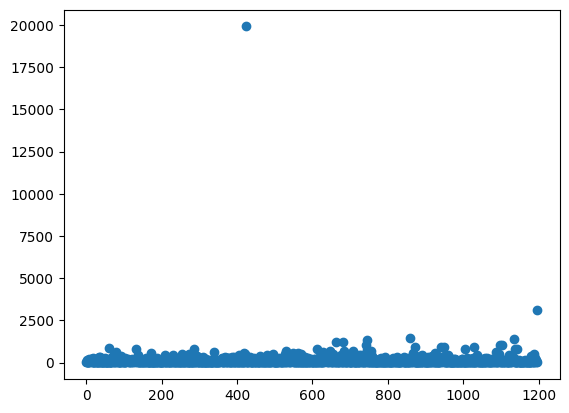

In [280]:
x_values = pd.Series(range(0,len(df_orders)))
plt.scatter(x_values,df_orders['revenue'])

Tem 2 outlayers de numeros muito atipicos, que são de pedidos extraordinários. 

In [281]:

print(np.percentile(df_orders['revenue'], [ 95, 99]))

[435.54  900.904]


Uma grande maioria das transações gastam menos de 436 reaos. porém 5% tem mais de 436 reais e 1% tem mais de 901 reais.

O ponto em que os dados se tornam anomalia é 436 reais

In [282]:
alpha = 0.05  # nível de significância

def significancia_estatistica(df1, df2):
    results = st.mannwhitneyu(df1, df2, alternative='less')

    print("🔍 Teste de Mann-Whitney U")
    print("Hipóteses:")
    print(" - H₀ (nula): A taxa de conversão cumulativa do grupo A é maior ou igual à do grupo B.")
    print(" - H₁ (alternativa): A taxa de conversão cumulativa do grupo A é menor que a do grupo B.")
    print()
    print(f"📊 p-value: {results.pvalue:.10f}")
    print()

    if results.pvalue < alpha:
        print("✅ Resultado: Hipótese nula rejeitada.")
        print("Conclusão: Há evidência estatística de que o grupo B possui uma taxa de conversão cumulativa maior que o grupo A.")
    else:
        print("❌ Resultado: Falha ao rejeitar a hipótese nula.")
        print("Conclusão: Não há evidência estatística suficiente para afirmar que o grupo B converte melhor que o grupo A.")


significancia_estatistica(df_agrupado_a['taxa_cumulativa'], df_agrupado_b['taxa_cumulativa'])

🔍 Teste de Mann-Whitney U
Hipóteses:
 - H₀ (nula): A taxa de conversão cumulativa do grupo A é maior ou igual à do grupo B.
 - H₁ (alternativa): A taxa de conversão cumulativa do grupo A é menor que a do grupo B.

📊 p-value: 0.0000000124

✅ Resultado: Hipótese nula rejeitada.
Conclusão: Há evidência estatística de que o grupo B possui uma taxa de conversão cumulativa maior que o grupo A.


O grupo A com certeza possui uma taxa de conversão menor que o grupo B 

In [283]:
df_orders_agrupado_a = df_orders_agrupado[df_orders_agrupado['group'] == 'A']
df_orders_agrupado_b = df_orders_agrupado[df_orders_agrupado['group'] == 'B']

def significancia_estatistica0(df1, df2):
    results = st.mannwhitneyu(df1, df2, alternative='less')

    print("🔍 Teste de Mann-Whitney U")
    print("Hipóteses:")
    print(" - H₀ (nula): O número cumulativo de pedidos do grupo A é maior ou igual ao do grupo B.")
    print(" - H₁ (alternativa): O número cumulativo de pedidos do grupo A é menor que o do grupo B.")
    print()
    print(f"📊 p-value: {results.pvalue:.5f}")
    print()

    if results.pvalue < alpha:
        print("✅ Resultado: Hipótese nula rejeitada.")
        print("Conclusão: Há evidência estatística de que o grupo B possui um número cumulativo de pedidos maior que o do grupo A.")
    else:
        print("❌ Resultado: Falha ao rejeitar a hipótese nula.")
        print("Conclusão: Não há evidência estatística suficiente para afirmar que o grupo B possui um número cumulativo de pedidos maior que o do grupo A.")

# Exemplo de chamada da função:
significancia_estatistica0(df_orders_agrupado_a['n_pedidos'], df_orders_agrupado_b['n_pedidos'])


🔍 Teste de Mann-Whitney U
Hipóteses:
 - H₀ (nula): O número cumulativo de pedidos do grupo A é maior ou igual ao do grupo B.
 - H₁ (alternativa): O número cumulativo de pedidos do grupo A é menor que o do grupo B.

📊 p-value: 0.84250

❌ Resultado: Falha ao rejeitar a hipótese nula.
Conclusão: Não há evidência estatística suficiente para afirmar que o grupo B possui um número cumulativo de pedidos maior que o do grupo A.


Portanto o grupo B tem mais pedidos.

In [284]:
df_orders_agrupado, df_orders_a

(       visitorid  n_pedidos group
 0        5114589          1     B
 1        6958315          1     B
 2        8300375          2     B
 3       11685486          1     A
 4       39475350          1     B
 ...          ...        ...   ...
 1026  4266935830          2     A
 1027  4278982564          1     A
 1028  4279090005          1     B
 1029  4281247801          1     B
 1030  4283872382          1     B
 
 [1031 rows x 3 columns],
       transactionid   visitorid       date  revenue group
 2        2961555356  4069496402 2019-08-15     10.2     A
 7        2626614568    78758296 2019-08-15     20.1     A
 8        1576988021   295230930 2019-08-15    215.9     A
 10       3649131742   879864040 2019-08-15     65.7     A
 12       2809384911  3213223594 2019-08-15    115.4     A
 ...             ...         ...        ...      ...   ...
 1187     2274188238   132143192 2019-08-14     15.5     A
 1188     1692103379  1022829655 2019-08-14      5.7     A
 1193     2203539145 

In [285]:
df_orders

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [286]:
df_visitors = df_orders_agrupado[df_orders_agrupado['n_pedidos']>2]['visitorid']

df_revenue = df_orders[df_orders['revenue']>436]['visitorid']
series_outlayers  = pd.concat([df_revenue, df_visitors], join='outer')
# len(df_visitors)
# series_outlayers = list(series_outlayers.astype(str))
df_filtrado = df_orders.drop(df_orders[df_orders['visitorid'].isin(series_outlayers)].index)
df_filtrado, len(series_outlayers)

(      transactionid   visitorid       date  revenue group
 0        3667963787  3312258926 2019-08-15     30.4     B
 1        2804400009  3642806036 2019-08-15     15.2     B
 2        2961555356  4069496402 2019-08-15     10.2     A
 3        3797467345  1196621759 2019-08-15    155.1     B
 4        2282983706  2322279887 2019-08-15     40.5     B
 ...             ...         ...        ...      ...   ...
 1190       38478481  1197745035 2019-08-14    135.3     B
 1191     3592955527   608641596 2019-08-14    255.7     B
 1192     2662137336  3733762160 2019-08-14    100.8     B
 1193     2203539145   370388673 2019-08-14     50.1     A
 1194     1807773912   573423106 2019-08-14    165.3     A
 
 [1007 rows x 5 columns],
 89)

In [287]:
df_filtrado_a = df_filtrado[df_filtrado['group'] == 'A']
df_filtrado_b = df_filtrado[df_filtrado['group'] == 'B']

In [288]:
df_merge_a = pd.merge(df_filtrado_a, df_visits_a, on='date')
df_merge_b = pd.merge(df_filtrado_b, df_visits_b, on='date')
df_agrupado_a_f = agrupar_por_data(df_merge_a)
df_agrupado_b_f = agrupar_por_data(df_merge_b)
df_agrupado_a_f['pedidos_acumulados'] = df_agrupado_a_f['visitor_count'].cumsum()
df_agrupado_a_f['visitas_acumuladas'] = df_agrupado_a_f['max_visits'].cumsum()
df_agrupado_a_f['taxa_cumulativa'] = df_agrupado_a_f['pedidos_acumulados'] / df_agrupado_a_f['visitas_acumuladas']

df_agrupado_b_f['pedidos_acumulados'] = df_agrupado_b_f['visitor_count'].cumsum()
df_agrupado_b_f['visitas_acumuladas'] = df_agrupado_b_f['max_visits'].cumsum()
df_agrupado_b_f['taxa_cumulativa'] = df_agrupado_b_f['pedidos_acumulados'] / df_agrupado_b_f['visitas_acumuladas']

def significancia_estatistica(df1, df2):
    results = st.mannwhitneyu(df1, df2, alternative='less')

    print("🔍 Teste de Mann-Whitney U, dados filtrados")
    print("Hipóteses:")
    print(" - H₀ (nula): A taxa de conversão cumulativa do grupo A é maior ou igual à do grupo B.")
    print(" - H₁ (alternativa): A taxa de conversão cumulativa do grupo A é menor que a do grupo B.")
    print()
    print(f"📊 p-value: {results.pvalue:.10f}")
    print()

    if results.pvalue < alpha:
        print("✅ Resultado: Hipótese nula rejeitada.")
        print("Conclusão: Há evidência estatística de que o grupo B possui uma taxa de conversão cumulativa maior que o grupo A.")
    else:
        print("❌ Resultado: Falha ao rejeitar a hipótese nula.")
        print("Conclusão: Não há evidência estatística suficiente para afirmar que o grupo B converte melhor que o grupo A.")


significancia_estatistica(df_agrupado_a_f['taxa_cumulativa'], df_agrupado_b_f['taxa_cumulativa'])

🔍 Teste de Mann-Whitney U, dados filtrados
Hipóteses:
 - H₀ (nula): A taxa de conversão cumulativa do grupo A é maior ou igual à do grupo B.
 - H₁ (alternativa): A taxa de conversão cumulativa do grupo A é menor que a do grupo B.

📊 p-value: 0.0000000003

✅ Resultado: Hipótese nula rejeitada.
Conclusão: Há evidência estatística de que o grupo B possui uma taxa de conversão cumulativa maior que o grupo A.


```
Valor p dos dados não filtrados:0.0000000124
Valor p dos dados     filtrados:0.0000000003
```

Existe uma confirmação mais certeira qu a hipótese deve ser rejeitada nos dados filtrados. 

In [289]:
df_orders_agrupado = df_orders_filtrado.groupby('visitorid')['transactionid'].count().reset_index()
df_orders_agrupado = df_orders_agrupado.rename(columns={'transactionid': 'n_pedidos'})

# Pegando o grupo de cada visitante (apenas o primeiro registro de cada visitante)
grupo_por_visitante = df_orders[['visitorid', 'group']].drop_duplicates(subset='visitorid')

# Fazendo o merge para adicionar a coluna 'group'
df_orders_agrupado = df_orders_agrupado.merge(grupo_por_visitante, on='visitorid', how='left')

df_orders_agrupado_a_f = df_orders_agrupado[df_orders_agrupado['group'] == 'A']
df_orders_agrupado_b_f = df_orders_agrupado[df_orders_agrupado['group'] == 'B']

def significancia_estatistica0(df1, df2):
    results = st.mannwhitneyu(df1, df2, alternative='less')

    print("🔍 Teste de Mann-Whitney U, dados filtrados")
    print("Hipóteses:")
    print(" - H₀ (nula): O número cumulativo de pedidos do grupo A é maior ou igual ao do grupo B.")
    print(" - H₁ (alternativa): O número cumulativo de pedidos do grupo A é menor que o do grupo B.")
    print()
    print(f"📊 p-value: {results.pvalue:.5f}")
    print()

    if results.pvalue < alpha:
        print("✅ Resultado: Hipótese nula rejeitada.")
        print("Conclusão: Há evidência estatística de que o grupo B possui um número cumulativo de pedidos maior que o do grupo A.")
    else:
        print("❌ Resultado: Falha ao rejeitar a hipótese nula.")
        print("Conclusão: Não há evidência estatística suficiente para afirmar que o grupo B possui um número cumulativo de pedidos maior que o do grupo A.")

# Exemplo de chamada da função:
significancia_estatistica0(df_orders_agrupado_a_f['n_pedidos'], df_orders_agrupado_b_f['n_pedidos'])

🔍 Teste de Mann-Whitney U, dados filtrados
Hipóteses:
 - H₀ (nula): O número cumulativo de pedidos do grupo A é maior ou igual ao do grupo B.
 - H₁ (alternativa): O número cumulativo de pedidos do grupo A é menor que o do grupo B.

📊 p-value: 0.70623

❌ Resultado: Falha ao rejeitar a hipótese nula.
Conclusão: Não há evidência estatística suficiente para afirmar que o grupo B possui um número cumulativo de pedidos maior que o do grupo A.


```
Valor p dos dados não filtrados:0.84250
Valor p dos dados     filtrados:0.70623
```

Existe uma confirmação menos certeira que " Falha ao rejeitar a hipótese nula" em comparação com os dados não filtardos, oque mostra como os outlayers influenciam. 

# Análise Final
Com base nos dados analisados, os testes indicam que o grupo B deve ser considerado o líder. 

Contudo, um estudo com um período de observação mais longo traria maior certeza sobre essa conclusão. 

# Análise Final e Conclusões do Teste A/B

Após analisar os dados do teste A/B, cheguei à conclusão de que **o Grupo B se destacou em relação ao Grupo A**.  Percebi que o Grupo B não só teve uma **taxa de conversão maior**, como também essa taxa se mostrou mais **estável** ao longo do tempo.  Enquanto o Grupo A oscilou bastante, o Grupo B manteve uma conversão consistentemente superior, especialmente depois de um período inicial.

Os testes estatísticos que realizei, o Mann-Whitney U, me mostraram com clareza que **a taxa de conversão do Grupo B é estatisticamente superior à do Grupo A**.  Essa conclusão se manteve firme mesmo depois que limpei os dados, removendo aqueles *outliers* que poderiam estar distorcendo a análise.

É interessante notar que, embora a conversão do Grupo B seja melhor, quando olhei para o número total de pedidos, a diferença entre os grupos não foi tão significativa estatisticamente. Isso me leva a pensar que a grande vantagem do Grupo B está em **converter mais visitas em pedidos**, e não necessariamente em ter um volume total de pedidos drasticamente maior.

**Em resumo, o que os dados me dizem é que a estratégia utilizada no Grupo B parece ser mais eficaz para aumentar a conversão.**  Claro, seria ótimo ter mais tempo de observação para ter ainda mais certeza, mas com as informações que tenho agora, **minha recomendação seria considerar seriamente a adoção da estratégia do Grupo B.**  Acredito que ela tem um potencial maior de trazer resultados positivos.